<a href="https://colab.research.google.com/github/MurtazAlek/MLDM-2021/blob/main/Murtazina_%22MLDM_2021_seminar06_homework%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

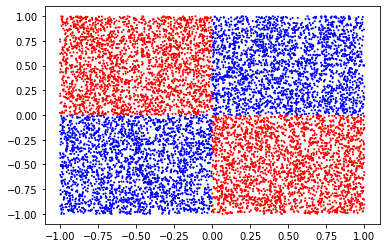

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
N=10000
data=np.column_stack((np.random.uniform(-1,1,N), np.random.uniform(-1,1,N)))
y=(data[:,0]>=0) ^ (data[:,1]>=0)

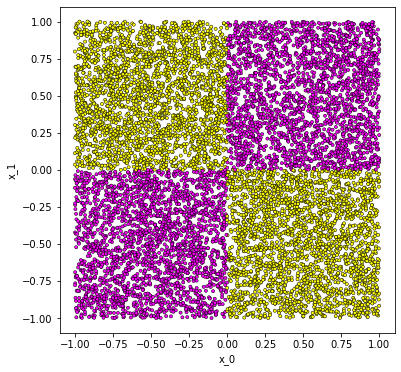

In [ ]:
fig_1, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6), squeeze=False, sharex=True)
ax_1=axes[0][0]
ax_1.scatter(data[:,0],data[:,1],c=y,s=10,cmap='spring', edgecolors='black', linewidth=0.5)
ax_1.set_xlabel('x_0', fontsize=10)
ax_1.set_ylabel('x_1', fontsize=10)
plt.show()


In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

def get_key(d, value):
    for k, v in d.items():
        if v > value:
            return k


In [ ]:
d={}
depth=[1,2,3,4,5,6,7,8,9]
for i in depth:
  clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_leaf=2, random_state=17)
  clf_tree.fit(data, y)
  d[i]=clf_tree.score(data,y)

print(get_key(d,0.99))

print(d)

6
{1: 0.5074, 2: 0.5112, 3: 0.5186, 4: 0.5195, 5: 0.6576, 6: 0.9997, 7: 1.0, 8: 1.0, 9: 1.0}


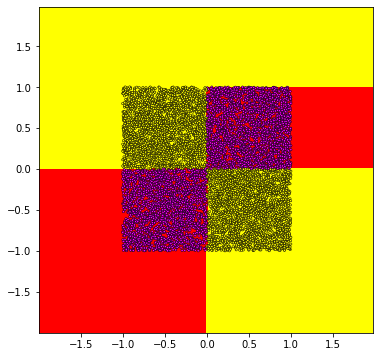

In [ ]:
plt.figure(figsize=(6,6))
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=get_key(d,0.99), min_samples_leaf=2, random_state=17)
clf_tree.fit(data, y)

xx, yy = get_grid(data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(data[:, 0], data[:, 1], c=y, s=5,cmap='spring', edgecolors='black', linewidth=0.5)
plt.show()

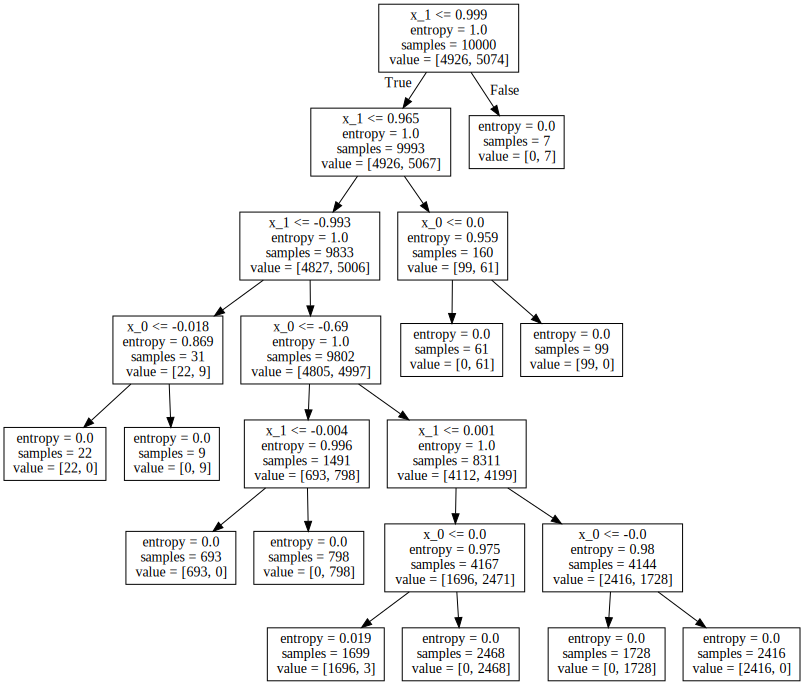

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
Source( export_graphviz(clf_tree, out_file=None, feature_names=['x_0', 'x_1']))

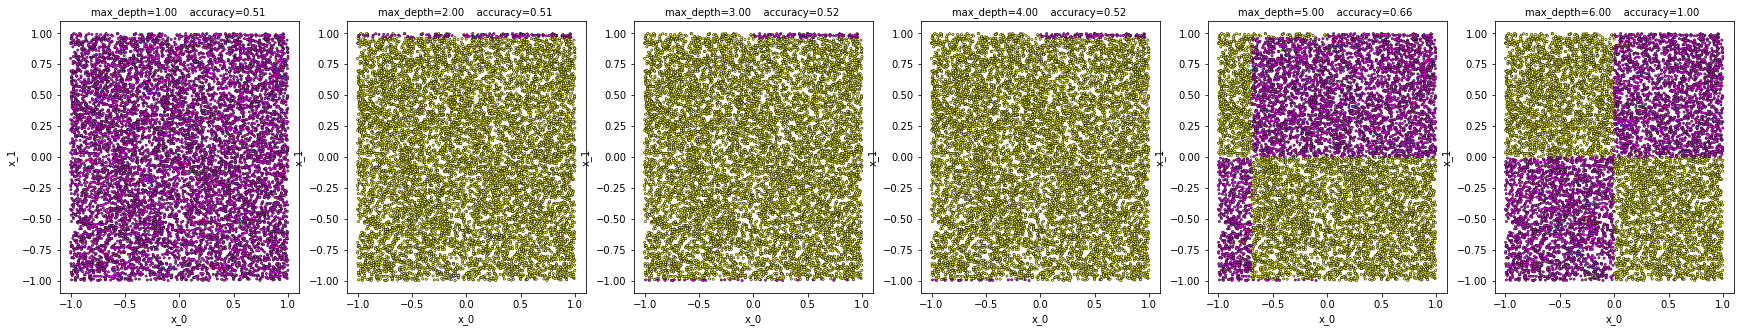

In [ ]:
fig_2, axes = plt.subplots(nrows=1, ncols=get_key(d,0.99), figsize=(5*get_key(d,0.99),5), squeeze=False, sharex=False)
for i in range(1,get_key(d,0.99)+1):
  ax=axes[0][i-1]
  clf=DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_leaf=2, random_state=17)
  clf.fit(data,y)
  predicted_y=clf.predict(data)
  ax.scatter(data[:,0],data[:,1],c=predicted_y,s=5,cmap='spring', edgecolors='black', linewidth=0.5)
  ax.set_xlabel('x_0', fontsize=10)
  ax.set_ylabel('x_1', fontsize=10)
  ax.set_title('max_depth=%0.2f    accuracy=%0.2f ' % (int(i),clf.score(data,y)),fontsize=10)
plt.show()

# Task 2 (3 points)

Consider the following dataset:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
data = load_breast_cancer()
#print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)



Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [ ]:
L={}
max_depth=range(1,11)
max_features=range(4,31)
dict={'malignant' : 2., 'benign' : 1.}
for l in max_depth:
  F={}
  for f in max_features:
    est=DecisionTreeClassifier(max_depth=l,max_features=f, random_state=17, class_weight=dict)
    est.fit(X_train,y_train)
    F[f]=roc_auc_score(y_test,est.predict_proba(X_test)[:,1])
  L[l]=F

a=np.array(pd.DataFrame(L.values())).ravel()
b=np.sort(a)[-2:]
print(b)

[0.94863598 0.94895567]


In [ ]:
def getIndexes(df_data, value):
  listOfPos = list()
  result = df_data.isin([value])
  seriesObj = result.any()
  columnNames = list(seriesObj[seriesObj == True].index)
  for col in columnNames:
    rows = list(result[col][result[col] == True].index)
    for row in rows:
      listOfPos.append((row, col))
    
  return listOfPos



In [ ]:
best=getIndexes(pd.DataFrame(L),b[1])
pre_best=getIndexes(pd.DataFrame(L),b[0])
print(b)
print(best)
print(pre_best)

[0.94863598 0.94895567]
[(4, 2)]
[(4, 3)]


In [ ]:
dict={'malignant' : 2., 'benign' : 1.}
tree_best = DecisionTreeClassifier(max_depth=best[0][1], random_state=17, max_features=best[0][0], class_weight=dict)
tree_pre_best = DecisionTreeClassifier(max_depth=pre_best[0][1], random_state=17, max_features=pre_best[0][0], class_weight=dict)

tree_best.fit(X_train, y_train)
tree_pre_best.fit(X_train, y_train)

y_score_best = tree_best.predict_proba(X_test)[:,1]
y_score_pre_best = tree_pre_best.predict_proba(X_test)[:,1]

accuracy_best=roc_auc_score(y_test, y_score_best )
accuracy_pre_best=roc_auc_score(y_test, y_score_pre_best )

print(accuracy_best)
print(accuracy_pre_best)

0.9489556692242115
0.9486359761295823


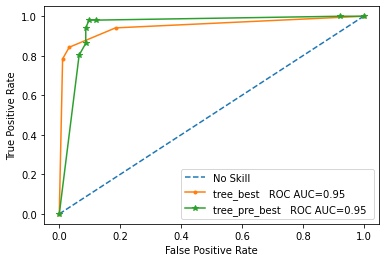

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(pd.factorize(y_test)[0], ns_probs)

ns_fpr, ns_tpr, _ = roc_curve(pd.factorize(y_test)[0], ns_probs)
tree_best_fpr, tree_best_tpr, _ = roc_curve(pd.factorize(y_test)[0], y_score_best)
tree_pre_best_fpr, tree_pre_best_tpr, _ = roc_curve(pd.factorize(y_test)[0], y_score_pre_best)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(tree_best_fpr, tree_best_tpr, marker='.', label='tree_best   ROC AUC=%0.2f ' % accuracy_best)
pyplot.plot(tree_pre_best_fpr, tree_pre_best_tpr, marker='*', label='tree_pre_best   ROC AUC=%0.2f ' % accuracy_pre_best)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

